In [5]:
import sys
from pathlib import Path
project_root = Path.cwd().parents[0]  # importing functions from other folders
sys.path.insert(0, str(project_root))

In [31]:
from _data.data_utils import read_in
import os
from patsy import dmatrix
import numpy as np
from matplotlib import pyplot as plt

In [10]:

if '___laptop' in os.listdir('../'):
    # laptop folder
    folder = "../../_data/p-dengue/"
elif '___server' in os.listdir('../'):
    # server folder
    folder = "../../../../../data/lucaratzinger_data/p_dengue/"

In [11]:
data_settings = {'admin':2, 'max_lag':6, 'start_year':2016, 'start_month':1, 'end_year':2019, 'end_month':12}
data = read_in(folder, **data_settings, standardise=True, dropna=True, celsius=True, tp_log=True)

In [13]:
stat_name = 'tp_24hmean_pop_weighted_log(0)'

In [84]:
num_knots = 5
degree = 3

In [85]:
d=data[stat_name]
d = np.linspace(0, 1, 1000)
knot_list = np.linspace(np.min(d), np.max(d), num_knots+2)[1:-1]

In [86]:
B = dmatrix(f"bs(s, knots=knots, degree=degree, include_intercept=True)-1",
                        {"s": np.linspace(np.min(d), np.max(d), 100), "knots": knot_list, "degree":degree})

In [87]:
B

DesignMatrix with shape (100, 9)
  Columns:
    ['bs(s, knots=knots, degree=degree, include_intercept=True)[0]',
     'bs(s, knots=knots, degree=degree, include_intercept=True)[1]',
     'bs(s, knots=knots, degree=degree, include_intercept=True)[2]',
     'bs(s, knots=knots, degree=degree, include_intercept=True)[3]',
     'bs(s, knots=knots, degree=degree, include_intercept=True)[4]',
     'bs(s, knots=knots, degree=degree, include_intercept=True)[5]',
     'bs(s, knots=knots, degree=degree, include_intercept=True)[6]',
     'bs(s, knots=knots, degree=degree, include_intercept=True)[7]',
     'bs(s, knots=knots, degree=degree, include_intercept=True)[8]']
  Terms:
    'bs(s, knots=knots, degree=degree, include_intercept=True)' (columns 0:9)
  (to view full data, use np.asarray(this_obj))

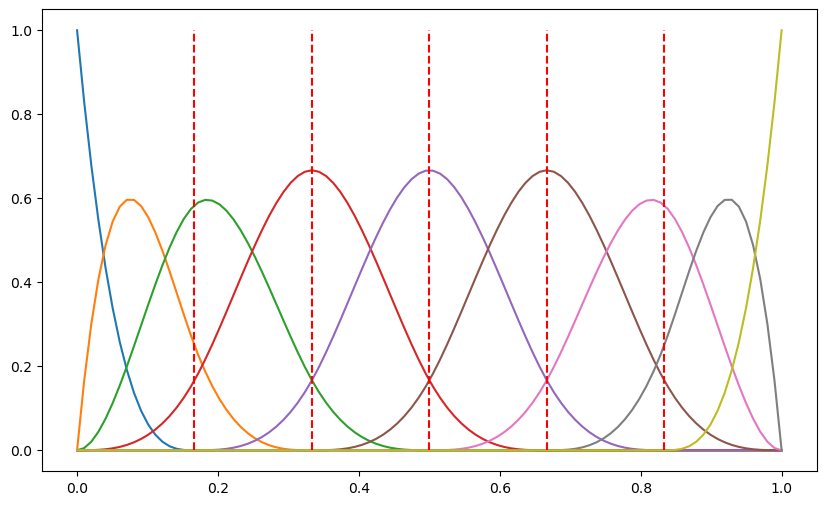

In [90]:
plt.figure(figsize=(10,6))
plt.plot(np.linspace(np.min(d), np.max(d), 100), B[:, :])
plt.vlines(knot_list, ymin=0, ymax=1, color='red', linestyle='--')
plt.show()

In [102]:
B.shape

(100, 9)

In [100]:
np.linalg.eig(B.T@B)[0]

array([14.82695819, 10.93791506,  7.24424446,  5.09910418,  3.66150739,
        2.55117893,  1.82537247,  0.58671602,  0.86136371])

In [103]:
np.linalg.inv(B.T@B)@B.T@np.ones(100)

array([1., 1., 1., 1., 1., 1., 1., 1., 1.])

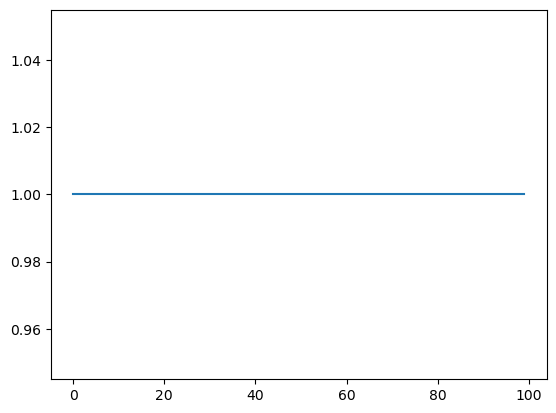

In [105]:
plt.plot(B@np.ones(9))

---

In [115]:
idata_file = "../../../../../data/lucaratzinger_data/p_dengue/model_fits/a2_201601_201912[nosurv+urb_p+s1l6_alt]/idata/idata_[[nosurv__urb_p][tp_24hmean_log_p(1)][3,5,q,o]].nc"

In [116]:
import arviz as az

In [117]:
idata = az.from_netcdf(idata_file)

In [123]:
stat_name = 'tp_24hmean_pop_weighted_log(1)'

In [133]:
data_settings = {'admin':2, 'max_lag':6, 'start_year':2016, 'start_month':1, 'end_year':2019, 'end_month':12}
data = read_in(folder, **data_settings, standardise=True, dropna=True, celsius=True, tp_log=True)
num_knots = 5
degree = 3
d=data[stat_name]
knot_list = np.percentile(d, np.linspace(0, 100, num_knots + 2))[1:-1]
plot_knots = (np.exp(knot_list) - 1e-6) * 1000

In [240]:
B_intercept = True
B=dmatrix(f"bs(s, knots=knots, degree=degree, include_intercept={B_intercept})-1",
                        {"s": data[stat_name], "knots": knot_list, "degree":degree})

print(np.min(np.abs(np.linalg.eig(B.T@B)[0])))
B = np.asarray(B)
B = (B - B.mean(axis=0)) / B.std(axis=0)
B, _ = np.linalg.qr(B)

d=data[stat_name]
d = np.asarray(d)
sorted_indices = np.argsort(d)
d = d[sorted_indices]
B = B[sorted_indices, :]

#B = np.asarray(B)
#B = (B - B.mean(axis=0)) / B.std(axis=0)
#B, _ = np.linalg.qr(B)

4.944096342797961


In [227]:
B.shape

(24107, 8)

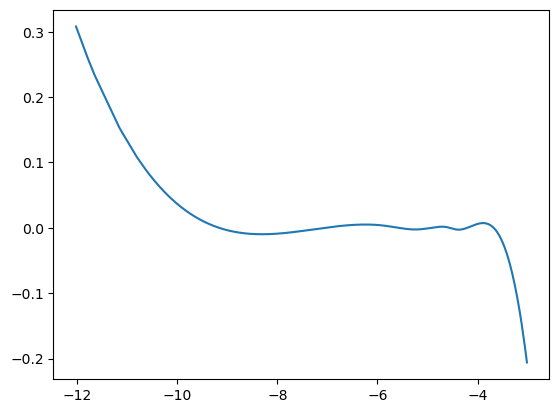

In [237]:
# sort d and B by d
#d = np.asarray(d)
#sorted_indices = np.argsort(d)
#d = d[sorted_indices]
#B = B[sorted_indices]
plt.plot(d, B[:, 7])
plt.show()

In [149]:
d

array([-12.02424832, -11.78955322, -11.65489411, ...,  -3.06598024,
        -3.04862671,  -3.01340661], shape=(24107,))